<a href="https://colab.research.google.com/github/Kim-Hyerin/pdm06/blob/master/py-pandas/pandas_4_visualizing_df_pdm06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python module 3. **pandas**

# Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline  # work for Jupyter notebook or lab

In [72]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20200928', periods=6) #20200928부터 6일의 index
dates

DatetimeIndex(['2020-09-28', '2020-09-29', '2020-09-30', '2020-10-01',
               '2020-10-02', '2020-10-03'],
              dtype='datetime64[ns]', freq='D')

In [73]:
# head()
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
# 6행 4열 무작위 데이터 , 열이름ABCD
df

,A,B,C,D
2020-09-28,-1.865047,0.813208,-0.385287,1.561285
2020-09-29,-0.889929,0.716339,-1.034372,0.218969
2020-09-30,-1.315963,2.141483,-1.110464,-0.799337
2020-10-01,-0.817796,0.265849,0.885443,-1.933696
2020-10-02,-0.108062,0.110582,0.355809,0.999190
2020-10-03,-0.538626,-0.104490,-0.286317,-1.175690




---



# 데이터 시각화

#### [도전] 데이터프레임 df의 평균(mean(0))과 표준편차를 이용한 그래프
- 평균에 대한 꺽은선그래프
- 평균과 표준편차를 이용한 막대그래프
> x-축은 A,B,C,D

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


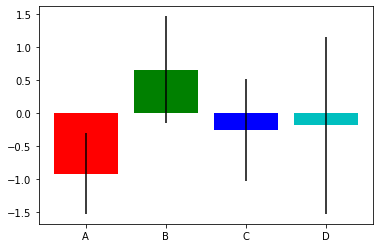

In [74]:
# df의 평균(mean(0))과 표준편차를 이용한 바그래프
bar_labels = df.columns
# plot bars
plt.bar(bar_labels, df.mean(0), yerr=df.std(0), color='rgbcy')
plt.show()

***

## pandas의 데이터 시각화 (Visualization)

In [75]:
df

,A,B,C,D
2020-09-28,-1.865047,0.813208,-0.385287,1.561285
2020-09-29,-0.889929,0.716339,-1.034372,0.218969
2020-09-30,-1.315963,2.141483,-1.110464,-0.799337
2020-10-01,-0.817796,0.265849,0.885443,-1.933696
2020-10-02,-0.108062,0.110582,0.355809,0.999190
2020-10-03,-0.538626,-0.104490,-0.286317,-1.175690


### 꺽은선 그래프

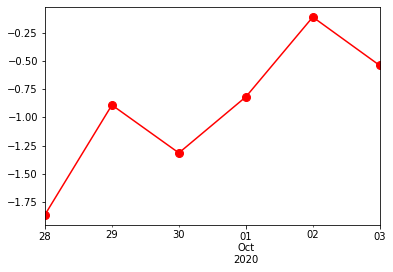

In [76]:
df['A'].plot(marker='o', c='r', ms=8)

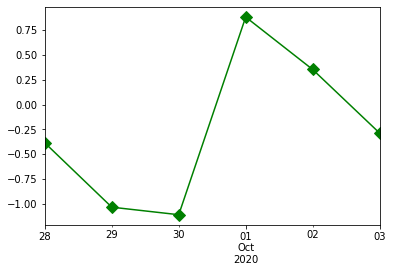

In [79]:
df['C'].plot(marker='D', c='g', ms=8)  # set figsize

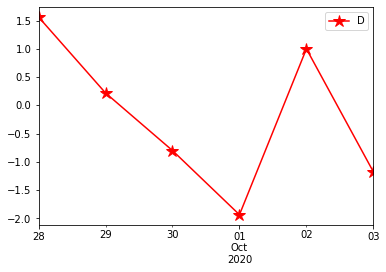

In [78]:
df.plot(y='D', marker='*', c='r', ms=12)
# y 축 D열의 각 데이터 
# x-축은 날짜인덱스

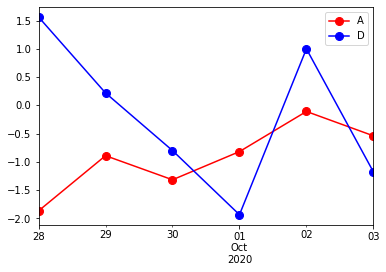

In [80]:
# 두 개의 그래프를 한 축에 그리기
# df['A','D'].plot(marker='o', c='r', ms=8)
df[['A','D']].plot(marker='o', color='rb', ms=8)  # works!, change colors
# 한 개의 그래프는 c 속성, 두 개 이상 그래프는 color 속성

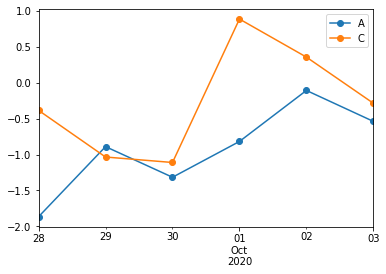

In [81]:
df.plot(y=['A','C'], marker='o') # color 지정 없으면 랜덤 지정

### 산포도 (Scatter graph)

In [82]:
df

,A,B,C,D
2020-09-28,-1.865047,0.813208,-0.385287,1.561285
2020-09-29,-0.889929,0.716339,-1.034372,0.218969
2020-09-30,-1.315963,2.141483,-1.110464,-0.799337
2020-10-01,-0.817796,0.265849,0.885443,-1.933696
2020-10-02,-0.108062,0.110582,0.355809,0.999190
2020-10-03,-0.538626,-0.104490,-0.286317,-1.175690


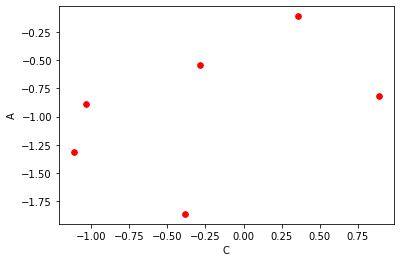

In [83]:
df.plot(kind='scatter',x='C',y='A', color='r', marker='o', s=32)
# x축=키 값 지정, y축=열 지정

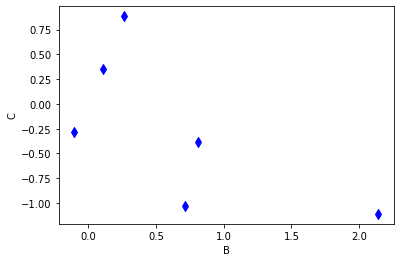

In [84]:
df.plot(kind='scatter',x='B',y='C', color='blue', marker='d', s=50)  

### 바 그래프

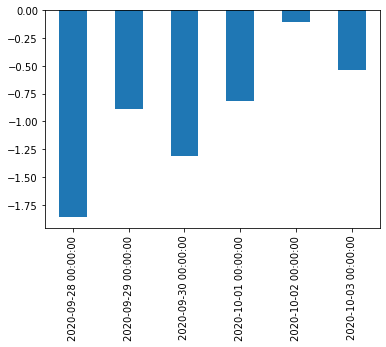

In [85]:
df['A'].plot.bar()

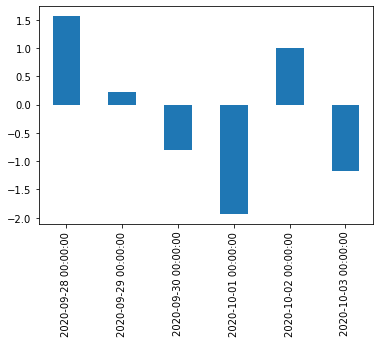

In [86]:
df['D'].plot.bar()

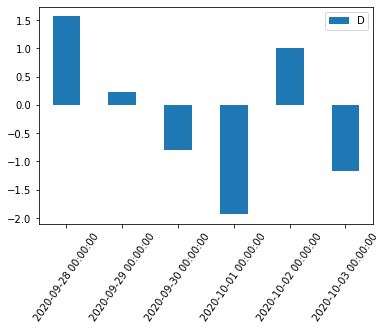

In [87]:
df.plot(kind='bar', y='D',rot=55) #rot레이블 각도 default 90도

#### 다중 바그래프

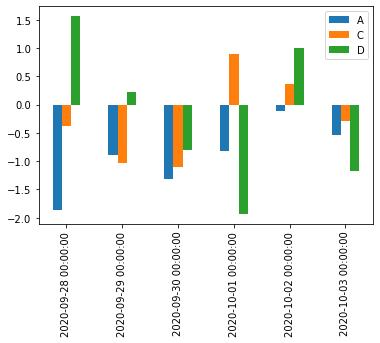

In [88]:
df.plot(kind='bar',y=['A','C','D'])

#### 평균/표준편차 그래프

In [89]:
df.mean(0), df.std(0), df.columns # 열방향으로 평균 표준편차(ABCD), 열의 키 값(ABCD)

(A   -0.922570
 B    0.657162
 C   -0.262531
 D   -0.188213
 dtype: float64, A    0.610884
 B    0.807843
 C    0.778531
 D    1.344006
 dtype: float64, Index(['A', 'B', 'C', 'D'], dtype='object'))

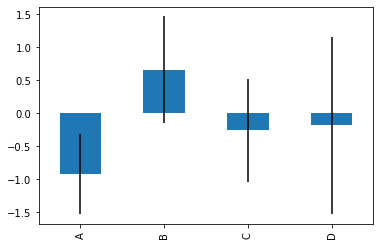

In [90]:
# plot bars
# bar_labels = df.columns
# plt.bar(bar_labels, df.mean(0), yerr=df.std(0))
df.mean(0).plot.bar(yerr=df.std(0)) #, rot=0) 



---



### 그래프 이어 그리기

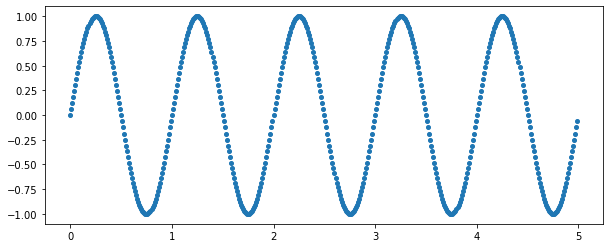

In [91]:
x1 = np.arange(0.0, 5.0, 0.01) # 0부터 5까지 0.01단위로 x축 값 만들기
y1 = np.sin(2*np.pi*x1) # x축 값에 대한 sin함수로 y축 값 만들기
plt.figure(figsize=(10,4)) # 사이즈 가로 세로의 비율 그래프
plt.plot(x1, y1, 'o', ms = 4) 

In [92]:
x1.shape, y1.shape #500개의 벡터

((500,), (500,))

#### pandas 데이터프레임을 이용한 그래프 

In [93]:
df = pd.DataFrame(dict(sine=y1), index=x1, columns=['sine'])
df.head()

,sine
0.00,0.000000
0.01,0.062791
0.02,0.125333
0.03,0.187381
0.04,0.248690


In [94]:
df.tail()

,sine
4.95,-0.309017
4.96,-0.248690
4.97,-0.187381
4.98,-0.125333
4.99,-0.062791


In [95]:
len(df)

500

In [96]:
pre_size = int(len(df) * 0.8)
post_size = len(df) - pre_size
pre, post = df.iloc[0:pre_size], df.iloc[pre_size:len(df)] #iloc, 앞부분/뒷부분
print(len(pre), len(post))

400 100


In [97]:
post.shape

(100, 1)

In [98]:
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1) #20%의 가우시안 잡음

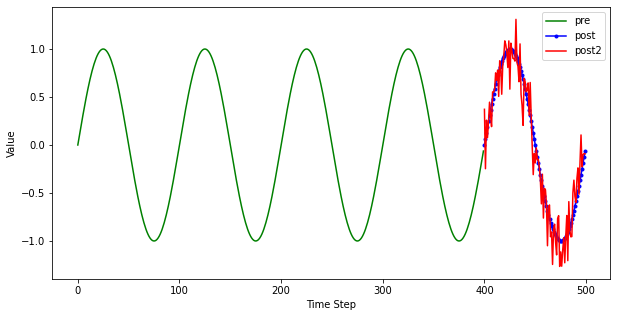

In [99]:
##데이터그래프
plt.figure(figsize=(10,5))
plt.plot(np.arange(0, len(pre)), pre, 'g', label="pre") 
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2") #20%잡음이 추가된 그래프
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

#### post  post2를 동시에 그려서 두 그래프를 비교해보시오. 

- subplot 사용
- 위, 아래로 그려서 비교

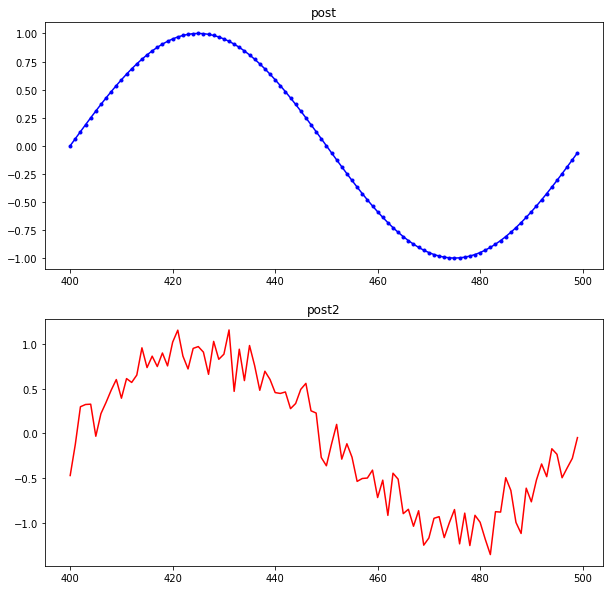

In [104]:
plt.figure(figsize=(10,10))
plt.subplot(211).set_title("post")
plt.plot(np.arange(len(pre), len(pre) + len(post)), post, 'b', marker='.', label="post")

plt.subplot(212).set_title("post2")
post2 = post + np.random.normal(scale=0.2, size=len(post)).reshape(-1,1)
plt.plot(np.arange(len(pre), len(pre) + len(post)), post2, 'r', label="post2")
plt.show()